In [22]:
import bars
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import random

In [23]:
import importlib
importlib.reload(bars)

[2025/03/14 09:48:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/vietz/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/vietz/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6

<module 'bars' from '/media/vietz/Data5/FPT/2025/SPRING/DPL302m/ASSIGNMENTS_AND_EXAMS/PROJECTS/ChartInsight/utils/bars.py'>

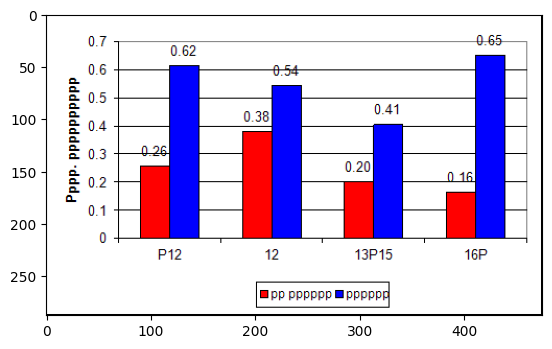

In [24]:
image_path = "./../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/8896506fff2fb5b692de7bc4c8e866ee_d3d3LnNzYy53aXNjLmVkdQkxNDQuOTIuMTkwLjQ3.xls-2-0.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

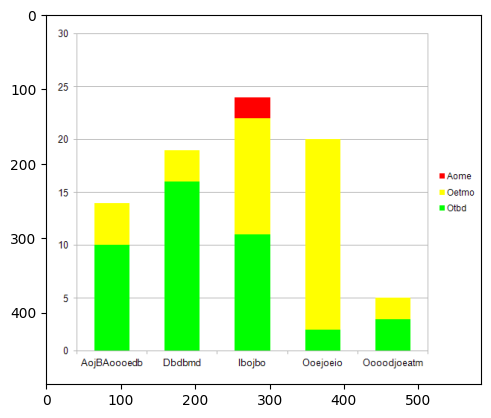

In [25]:
image_path = "./../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/8c992f9fee67dd6c66da0a30f477add4_b3BlbmFjY2Vzcy51b2MuZWR1CTIxMy43My40MC4yMTE=.xls-7-0.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [26]:
filtered = bars.detect_objects(bars.od_model, image, 4)
filtered


0: 544x640 1 Legend, 1 PlotArea, 1 InnerPlotArea, 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)


array([     11.278,      14.361,      512.66,      477.77,     0.97469,           4], dtype=float32)


image 1/1 /media/vietz/Data5/FPT/2025/SPRING/DPL302m/ASSIGNMENTS_AND_EXAMS/PROJECTS/ChartInsight/utils/../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/8c992f9fee67dd6c66da0a30f477add4_b3BlbmFjY2Vzcy51b2MuZWR1CTIxMy43My40MC4yMTE=.xls-7-0.png: 544x640 1 Legend, 1 PlotArea, 1 InnerPlotArea, 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)


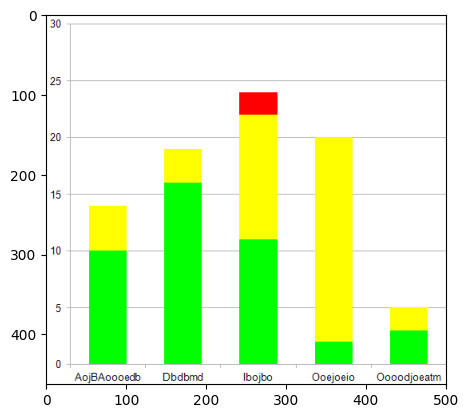

In [27]:
plot_area = bars.get_plot_area(image_path)
plt.imshow(plot_area)

In [28]:
bar_anns = bars.get_bar_anns(plot_area)
bar_anns


0: 608x640 11 Seriess, 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 640)


array([[     148.41,      210.79,      195.14,      437.73,     0.95375,           0],
       [     54.285,      295.67,      101.13,      437.92,     0.94721,           0],
       [     242.33,      281.49,      289.96,       437.9,     0.94615,           0],
       [     337.19,       153.9,      383.96,      409.01,     0.94107,           0],
       [     148.65,      168.64,      195.08,       210.7,     0.92959,           0],
       [     431.34,       395.4,      477.89,      437.68,     0.92835,           0],
       [      242.3,      125.25,      290.05,      281.77,      0.9269,           0],
       [     337.48,      409.49,      383.95,      437.62,     0.92548,           0],
       [      54.67,      239.89,      101.14,      295.48,     0.92493,           0],
       [     242.74,      98.157,      290.03,      125.39,     0.91311,           0],
       [     431.24,      366.66,      478.01,      395.37,     0.90794,           0]], dtype=float32)

In [29]:
ocr_results = bars.get_ocr_results(plot_area)
ocr_results

[2025/03/14 09:48:44] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.11619305610656738
[2025/03/14 09:48:44] ppocr DEBUG: cls num  : 12, elapsed : 0.028928041458129883
[2025/03/14 09:48:44] ppocr DEBUG: rec_res num  : 12, elapsed : 0.3466653823852539


[[[[[3.0, 5.0], [20.0, 5.0], [20.0, 19.0], [3.0, 19.0]],
   ('30', 0.9993171691894531)],
  [[[4.0, 78.0], [21.0, 78.0], [21.0, 91.0], [4.0, 91.0]],
   ('25', 0.999667763710022)],
  [[[3.0, 148.0], [21.0, 148.0], [21.0, 160.0], [3.0, 160.0]],
   ('20', 0.9985789060592651)],
  [[[5.0, 219.0], [21.0, 219.0], [21.0, 234.0], [5.0, 234.0]],
   ('15', 0.999807596206665)],
  [[[5.0, 289.0], [21.0, 289.0], [21.0, 303.0], [5.0, 303.0]],
   ('10', 0.9993672370910645)],
  [[[10.0, 361.0], [22.0, 361.0], [22.0, 375.0], [10.0, 375.0]],
   ('5', 0.999836802482605)],
  [[[35.0, 447.0], [119.0, 447.0], [119.0, 461.0], [35.0, 461.0]],
   ('AojBAoooedb', 0.9985814690589905)],
  [[[144.0, 446.0], [199.0, 446.0], [199.0, 461.0], [144.0, 461.0]],
   ('Dbdbmd', 0.9915657639503479)],
  [[[245.0, 447.0], [286.0, 447.0], [286.0, 462.0], [245.0, 462.0]],
   ('Ibojbo', 0.9703696370124817)],
  [[[333.0, 449.0], [387.0, 449.0], [387.0, 460.0], [333.0, 460.0]],
   ('Ooejoeio', 0.9633283615112305)],
  [[[413.0, 446.0

In [30]:
x_labels = bars.filter_x_labels(ocr_results, bar_anns=bar_anns)
y_labels = bars.filter_y_labels(ocr_results, bar_anns)

print(x_labels)
print(y_labels)

[{'text': 'AojBAoooedb', 'conf': 0.9985814690589905, 'x_mean': 77.0, 'y_mean': 454.0}, {'text': 'Dbdbmd', 'conf': 0.9915657639503479, 'x_mean': 171.5, 'y_mean': 453.5}, {'text': 'Ibojbo', 'conf': 0.9703696370124817, 'x_mean': 265.5, 'y_mean': 454.5}, {'text': 'Ooejoeio', 'conf': 0.9633283615112305, 'x_mean': 360.0, 'y_mean': 454.5}, {'text': 'Oooodjoeatm', 'conf': 0.9565330147743225, 'x_mean': 455.0, 'y_mean': 453.5}]
[{'text': '30', 'conf': 0.9993171691894531, 'x_mean': 11.5, 'y_mean': 12.0}, {'text': '25', 'conf': 0.999667763710022, 'x_mean': 12.5, 'y_mean': 84.5}, {'text': '20', 'conf': 0.9985789060592651, 'x_mean': 12.0, 'y_mean': 154.0}, {'text': '15', 'conf': 0.999807596206665, 'x_mean': 13.0, 'y_mean': 226.5}, {'text': '10', 'conf': 0.9993672370910645, 'x_mean': 13.0, 'y_mean': 296.0}, {'text': '5', 'conf': 0.999836802482605, 'x_mean': 16.0, 'y_mean': 368.0}]


In [31]:
bar_info = bars.get_bar_values(plot_area)
bar_info


0: 608x640 11 Seriess, 35.6ms
Speed: 2.3ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)
[2025/03/14 09:48:44] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.04661393165588379
[2025/03/14 09:48:44] ppocr DEBUG: cls num  : 12, elapsed : 0.016339778900146484
[2025/03/14 09:48:44] ppocr DEBUG: rec_res num  : 12, elapsed : 0.3109889030456543


[{'bbox': [54.28483963012695,
   295.66802978515625,
   101.12593078613281,
   437.9195556640625],
  'label': 'AojBAoooedb',
  'value': 9.989573446552406,
  'color': '#7CFC00'},
 {'bbox': [54.66957092285156,
   239.88670349121094,
   101.14244842529297,
   295.47564697265625],
  'label': 'AojBAoooedb',
  'value': 3.903717941112733,
  'color': '#7CFC00'},
 {'bbox': [148.40695190429688,
   210.78775024414062,
   195.13743591308594,
   437.7313537597656],
  'label': 'Dbdbmd',
  'value': 15.937050808681532,
  'color': '#00FF00'},
 {'bbox': [148.6513671875,
   168.6428680419922,
   195.07676696777344,
   210.70208740234375],
  'label': 'Dbdbmd',
  'value': 2.953596865193228,
  'color': '#00FF00'},
 {'bbox': [242.3323211669922,
   281.4850769042969,
   289.9571838378906,
   437.9041442871094],
  'label': 'Ibojbo',
  'value': 10.984485069017733,
  'color': '#7CFC00'},
 {'bbox': [242.2973175048828,
   125.25047302246094,
   290.047607421875,
   281.77496337890625],
  'label': 'Ibojbo',
  'valu

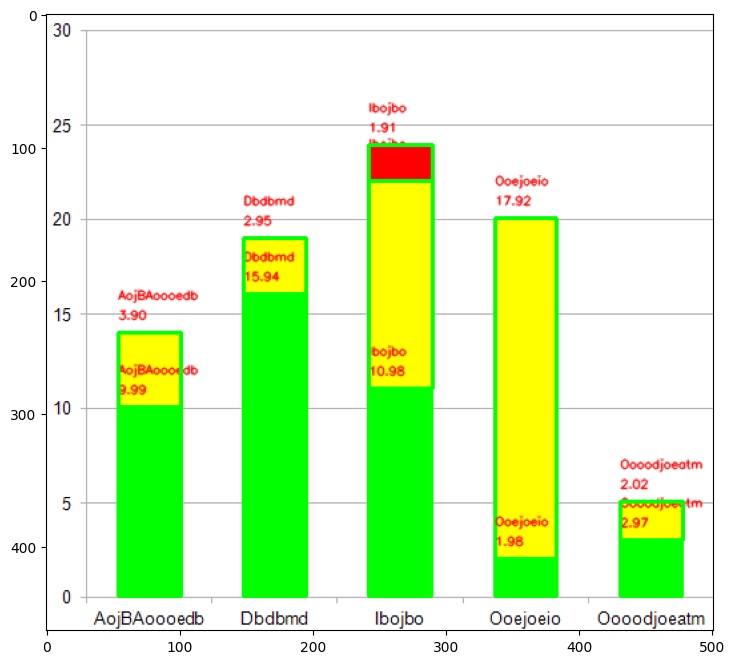

In [32]:
# plot the bars 
plot_area_copy = plot_area.copy()

for bar in bar_info:
    x1, y1, x2, y2 = map(int, bar['bbox'])

    cv2.rectangle(plot_area_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    text_x = x1
    text_y = y1 - 10 

    cv2.putText(plot_area_copy, bar['label'], (text_x, text_y - 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

    value_text = f"{bar['value']:.2f}"
    cv2.putText(plot_area_copy, value_text, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

plt.figure(figsize=(10, 8))
plt.imshow(plot_area_copy)
plt.show()

In [33]:
def plot_bar_ocr(image_path, numbers=20):
    # Lấy danh sách tất cả các ảnh trong thư mục
    image_files = glob.glob(os.path.join(image_path, "*.png"))  # Thay đổi định dạng nếu cần (*.jpg, *.jpeg, *.bmp,...)
    
    # Kiểm tra nếu số lượng ảnh trong thư mục ít hơn số ảnh yêu cầu
    if len(image_files) < numbers:
        print(f"Chỉ có {len(image_files)} ảnh trong thư mục, hiển thị tất cả.")
        selected_files = image_files
    else:
        selected_files = random.sample(image_files, numbers)  # Lấy ngẫu nhiên 'numbers' ảnh
    
    for img_file in selected_files:
        plot_area = cv2.imread(img_file)
        plot_area = cv2.cvtColor(plot_area, cv2.COLOR_BGR2RGB)

        # Lấy thông tin từ biểu đồ
        bar_info = bars.get_bar_values(plot_area)

        # Vẽ bounding box lên ảnh
        plot_area_copy = plot_area.copy()
        for bar in bar_info:
            x1, y1, x2, y2 = map(int, bar['bbox'])
            cv2.rectangle(plot_area_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            text_x, text_y = x1, y1 - 10
            cv2.putText(plot_area_copy, bar['label'], (text_x, text_y - 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

            value_text = f"{bar['value']:.2f}"
            cv2.putText(plot_area_copy, value_text, (text_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

        # Hiển thị ảnh
        plt.figure(figsize=(10, 8))
        plt.imshow(plot_area_copy)
        plt.title(f"Processed: {os.path.basename(img_file)}")
        plt.axis("off")
        plt.show()

In [34]:
image_path = './../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/'


0: 384x640 5 Seriess, 23.7ms
Speed: 1.6ms preprocess, 23.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/14 09:48:45] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.07519030570983887
[2025/03/14 09:48:45] ppocr DEBUG: cls num  : 4, elapsed : 0.021823883056640625
[2025/03/14 09:48:45] ppocr DEBUG: rec_res num  : 4, elapsed : 0.14471673965454102
[DEBUG] Not enough Y-axis labels to calculate values!


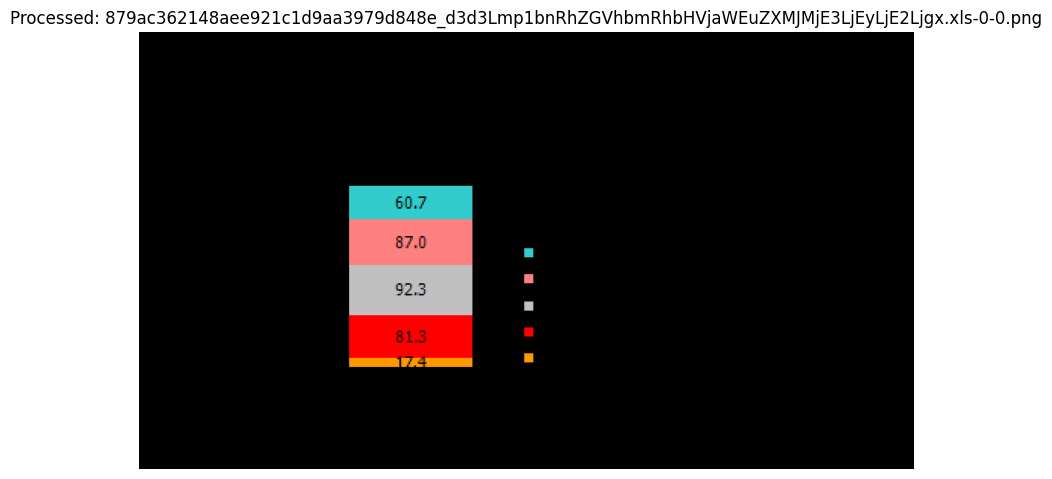


0: 448x640 84 Seriess, 27.8ms
Speed: 2.9ms preprocess, 27.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/14 09:48:45] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.2023172378540039
[2025/03/14 09:48:45] ppocr DEBUG: cls num  : 5, elapsed : 0.018919944763183594
[2025/03/14 09:48:45] ppocr DEBUG: rec_res num  : 5, elapsed : 0.15421152114868164
[DEBUG] Not enough Y-axis labels to calculate values!


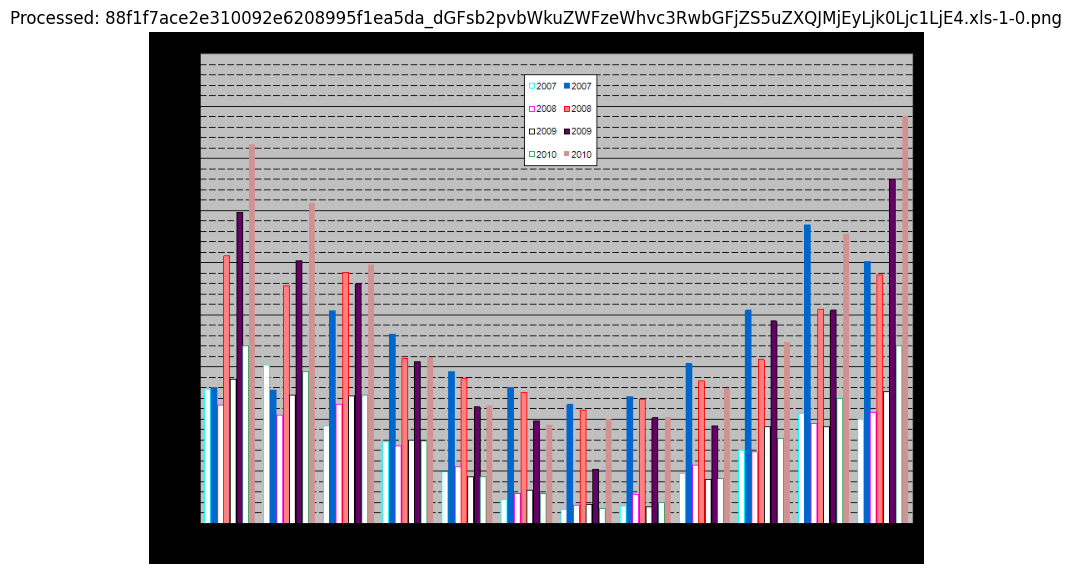


0: 256x640 20 Seriess, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/14 09:48:46] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.14798998832702637
[2025/03/14 09:48:46] ppocr DEBUG: cls num  : 24, elapsed : 0.047298431396484375
[2025/03/14 09:48:47] ppocr DEBUG: rec_res num  : 24, elapsed : 1.5241315364837646


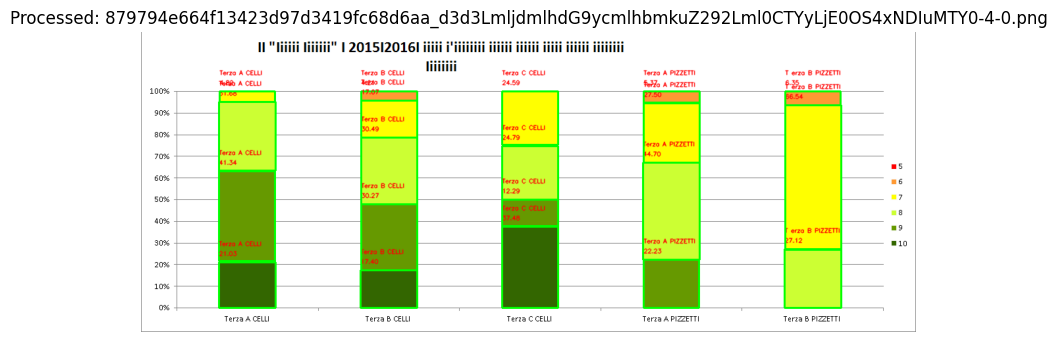


0: 288x640 39 Seriess, 19.3ms
Speed: 1.2ms preprocess, 19.3ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/14 09:48:47] ppocr DEBUG: dt_boxes num : 97, elapsed : 0.13879036903381348
[2025/03/14 09:48:48] ppocr DEBUG: cls num  : 97, elapsed : 0.13431167602539062
[2025/03/14 09:48:50] ppocr DEBUG: rec_res num  : 97, elapsed : 2.631166458129883


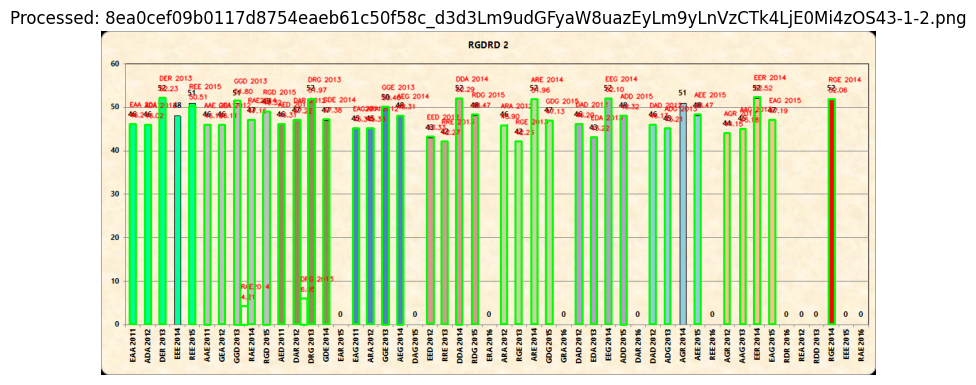


0: 256x640 65 Seriess, 17.7ms
Speed: 0.9ms preprocess, 17.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/14 09:48:50] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.06418061256408691
[2025/03/14 09:48:50] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/14 09:48:50] ppocr DEBUG: rec_res num  : 0, elapsed : 4.76837158203125e-07
No OCR results found for the X-axis!
No OCR results found for the Y-axis!
[DEBUG] Not enough Y-axis labels to calculate values!


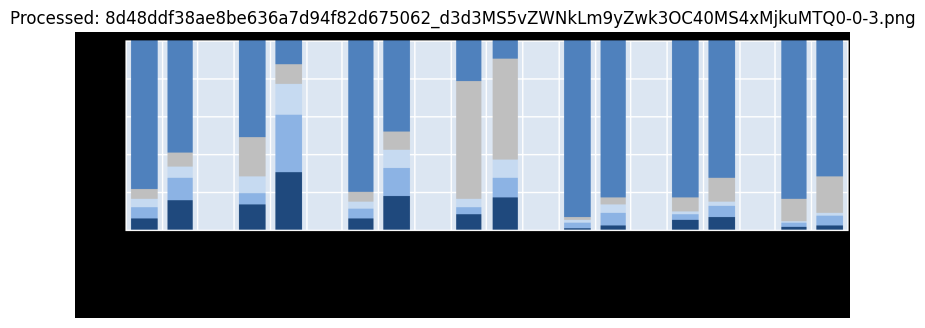


0: 416x640 82 Seriess, 26.6ms
Speed: 2.4ms preprocess, 26.6ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/14 09:48:51] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.12256097793579102
[2025/03/14 09:48:51] ppocr DEBUG: cls num  : 35, elapsed : 0.04819941520690918
[2025/03/14 09:48:52] ppocr DEBUG: rec_res num  : 35, elapsed : 0.8715686798095703


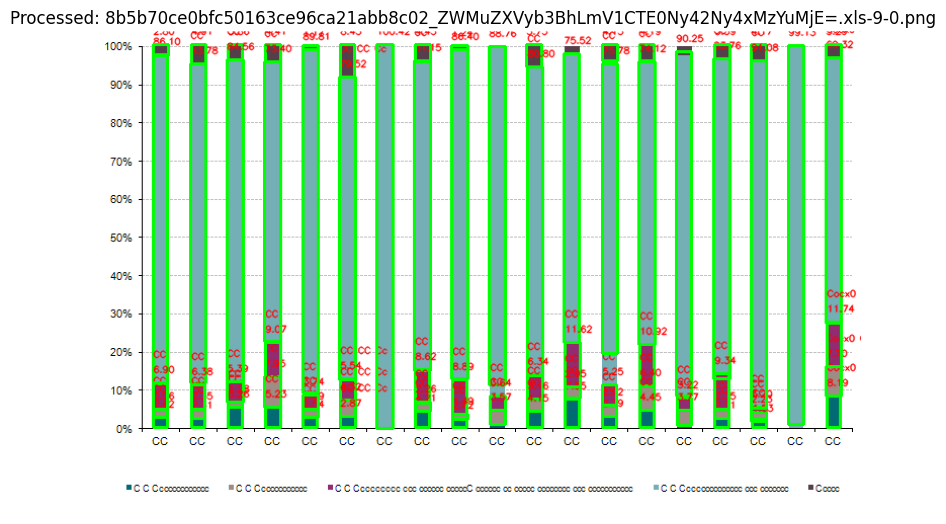


0: 256x640 4 Seriess, 17.9ms
Speed: 1.5ms preprocess, 17.9ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/14 09:48:52] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.16466212272644043
[2025/03/14 09:48:52] ppocr DEBUG: cls num  : 20, elapsed : 0.04255962371826172
[2025/03/14 09:48:53] ppocr DEBUG: rec_res num  : 20, elapsed : 1.0156543254852295


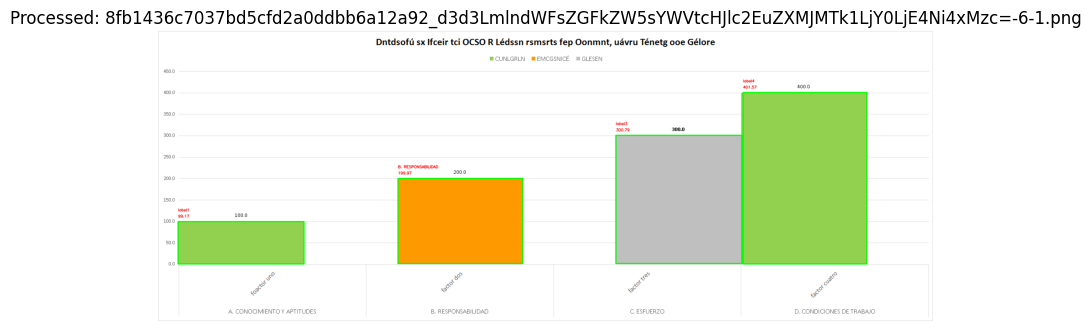


0: 480x640 12 Seriess, 28.7ms
Speed: 1.8ms preprocess, 28.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/14 09:48:53] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.08811187744140625
[2025/03/14 09:48:53] ppocr DEBUG: cls num  : 31, elapsed : 0.041391611099243164
[2025/03/14 09:48:54] ppocr DEBUG: rec_res num  : 31, elapsed : 1.1416425704956055


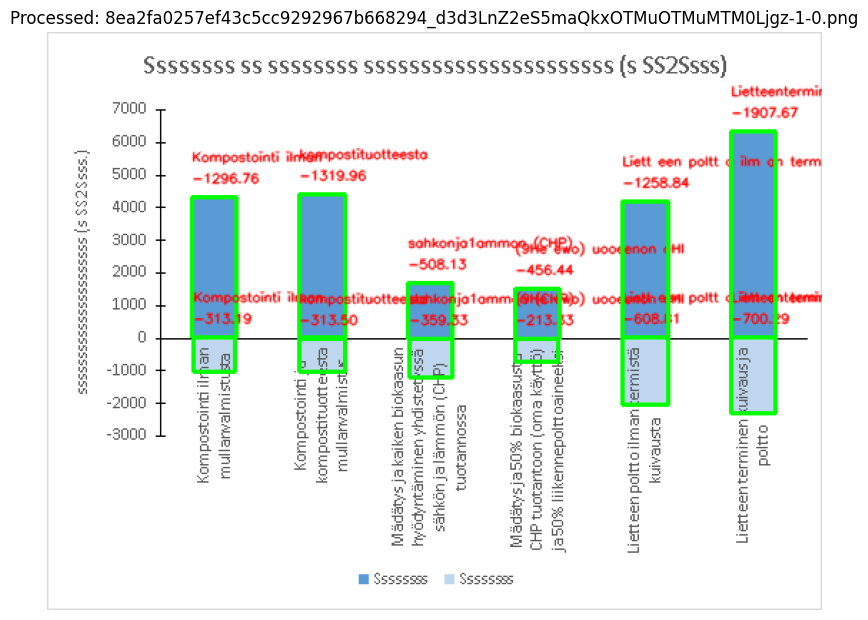


0: 384x640 5 Seriess, 23.5ms
Speed: 1.1ms preprocess, 23.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/14 09:48:55] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.05097055435180664
[2025/03/14 09:48:55] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/14 09:48:55] ppocr DEBUG: rec_res num  : 0, elapsed : 1.1920928955078125e-06
No OCR results found for the X-axis!
No OCR results found for the Y-axis!
[DEBUG] Not enough Y-axis labels to calculate values!


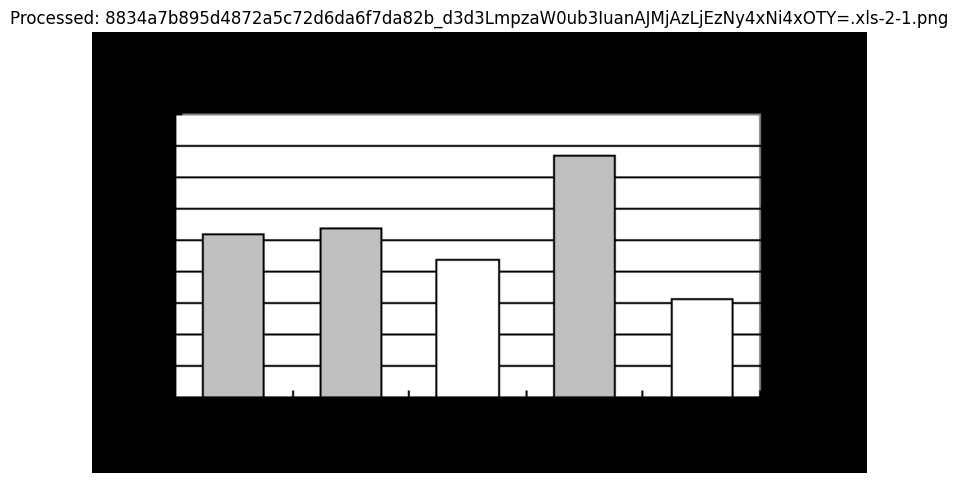


0: 320x640 16 Seriess, 21.8ms
Speed: 1.5ms preprocess, 21.8ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/14 09:48:55] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.12783145904541016
[2025/03/14 09:48:55] ppocr DEBUG: cls num  : 20, elapsed : 0.03320932388305664
[2025/03/14 09:48:56] ppocr DEBUG: rec_res num  : 20, elapsed : 0.6600751876831055


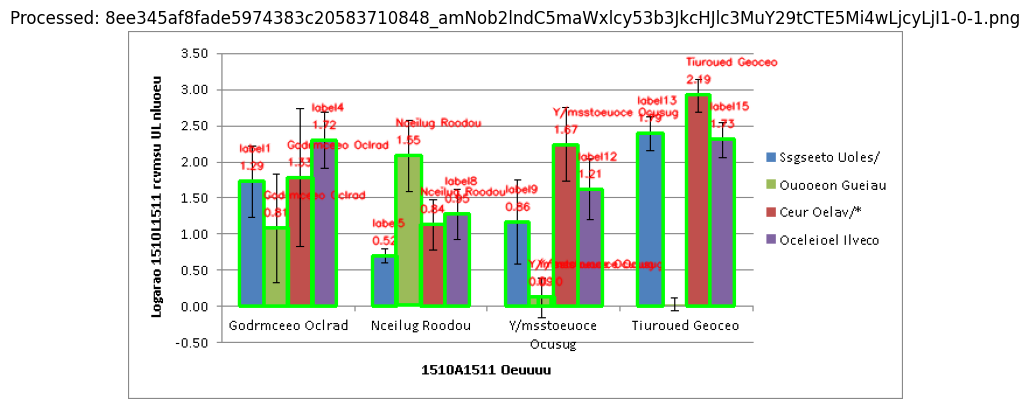


0: 288x640 8 Seriess, 19.6ms
Speed: 1.4ms preprocess, 19.6ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/14 09:48:56] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.08720517158508301
[2025/03/14 09:48:56] ppocr DEBUG: cls num  : 20, elapsed : 0.02899789810180664
[2025/03/14 09:48:56] ppocr DEBUG: rec_res num  : 20, elapsed : 0.7121720314025879


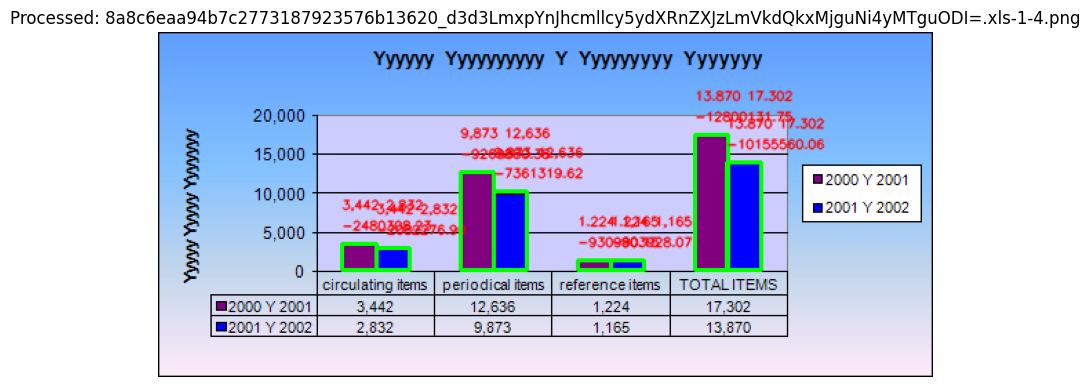


0: 320x640 8 Seriess, 21.8ms
Speed: 1.2ms preprocess, 21.8ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/14 09:48:57] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.1327512264251709
[2025/03/14 09:48:57] ppocr DEBUG: cls num  : 16, elapsed : 0.03361010551452637
[2025/03/14 09:48:57] ppocr DEBUG: rec_res num  : 16, elapsed : 0.46497392654418945


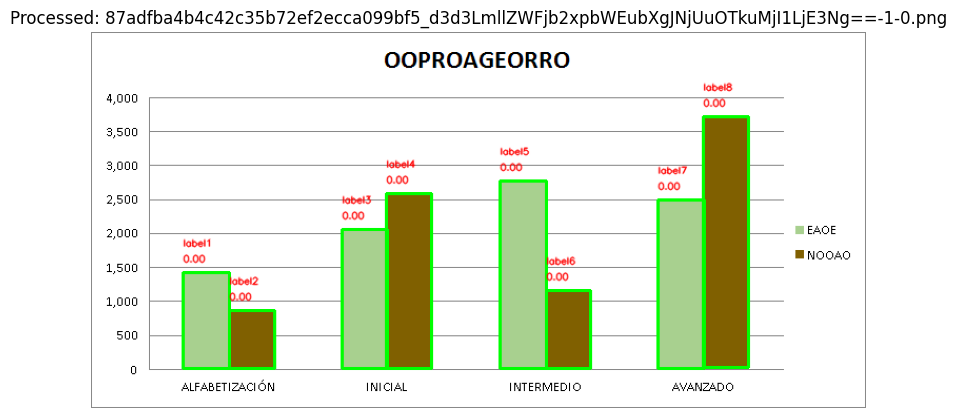


0: 288x640 38 Seriess, 19.1ms
Speed: 1.0ms preprocess, 19.1ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/14 09:48:57] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.06517624855041504
[2025/03/14 09:48:57] ppocr DEBUG: cls num  : 16, elapsed : 0.021960735321044922
[2025/03/14 09:48:58] ppocr DEBUG: rec_res num  : 16, elapsed : 0.44556331634521484


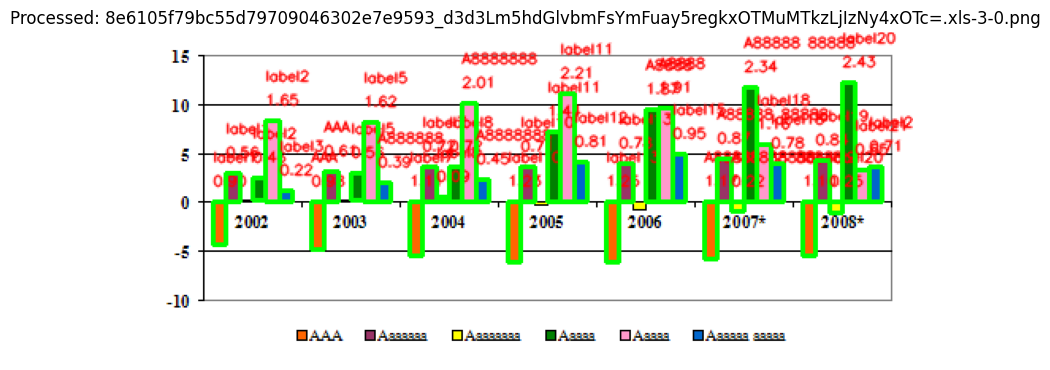


0: 384x640 59 Seriess, 24.2ms
Speed: 1.3ms preprocess, 24.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/14 09:48:58] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.12072014808654785
[2025/03/14 09:48:58] ppocr DEBUG: cls num  : 28, elapsed : 0.03913688659667969
[2025/03/14 09:48:59] ppocr DEBUG: rec_res num  : 28, elapsed : 0.766340970993042


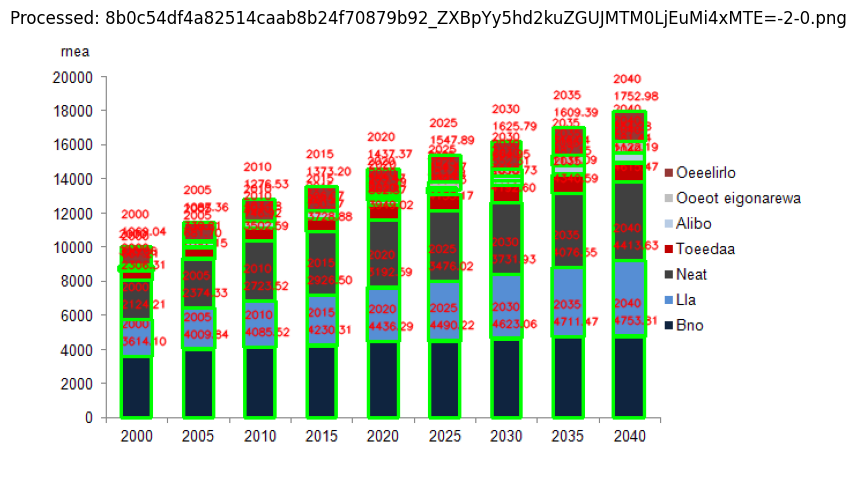


0: 608x640 4 Seriess, 36.2ms
Speed: 1.7ms preprocess, 36.2ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 640)
[2025/03/14 09:48:59] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.0456233024597168
[2025/03/14 09:48:59] ppocr DEBUG: cls num  : 15, elapsed : 0.030562639236450195
[2025/03/14 09:49:00] ppocr DEBUG: rec_res num  : 15, elapsed : 0.48163819313049316


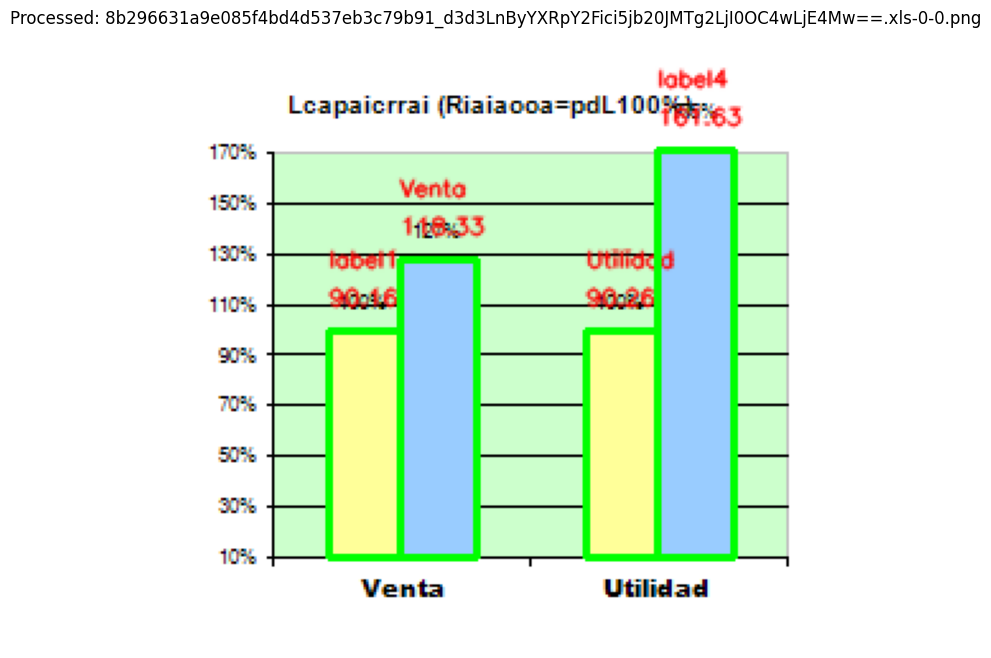


0: 448x640 23 Seriess, 27.5ms
Speed: 1.9ms preprocess, 27.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
[2025/03/14 09:49:00] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.21009063720703125
[2025/03/14 09:49:00] ppocr DEBUG: cls num  : 0, elapsed : 0
[2025/03/14 09:49:00] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06
No OCR results found for the X-axis!
No OCR results found for the Y-axis!
[DEBUG] Not enough Y-axis labels to calculate values!


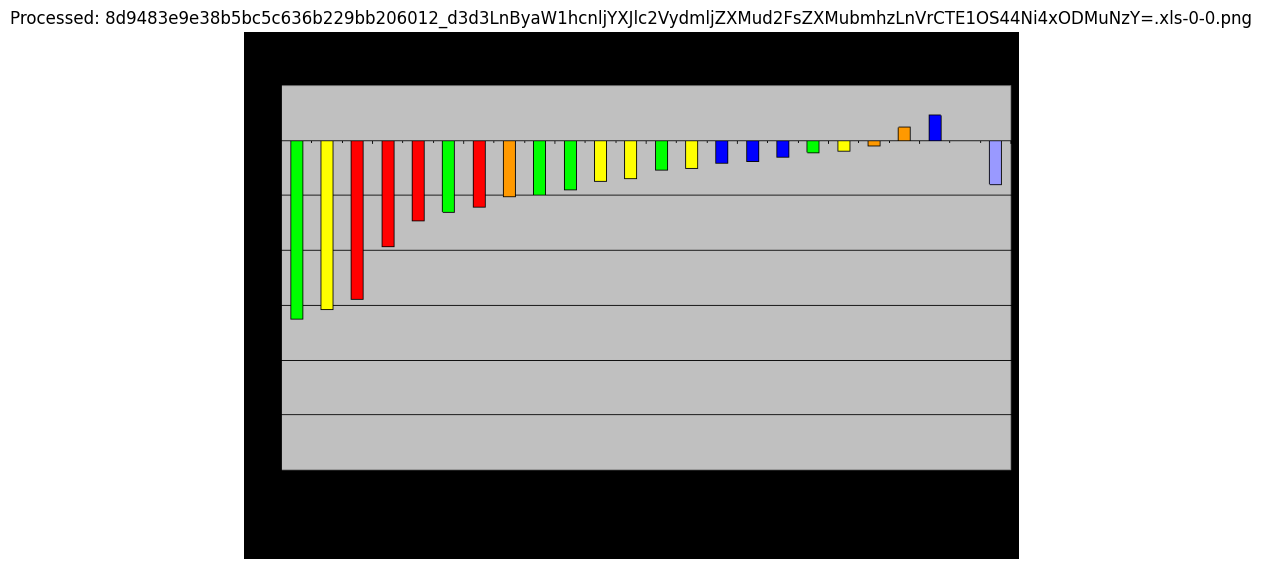


0: 416x640 3 Seriess, 26.5ms
Speed: 2.0ms preprocess, 26.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/14 09:49:00] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.1728525161743164
[2025/03/14 09:49:00] ppocr DEBUG: cls num  : 6, elapsed : 0.0072345733642578125
[2025/03/14 09:49:01] ppocr DEBUG: rec_res num  : 6, elapsed : 0.33988380432128906
[DEBUG] Not enough Y-axis labels to calculate values!


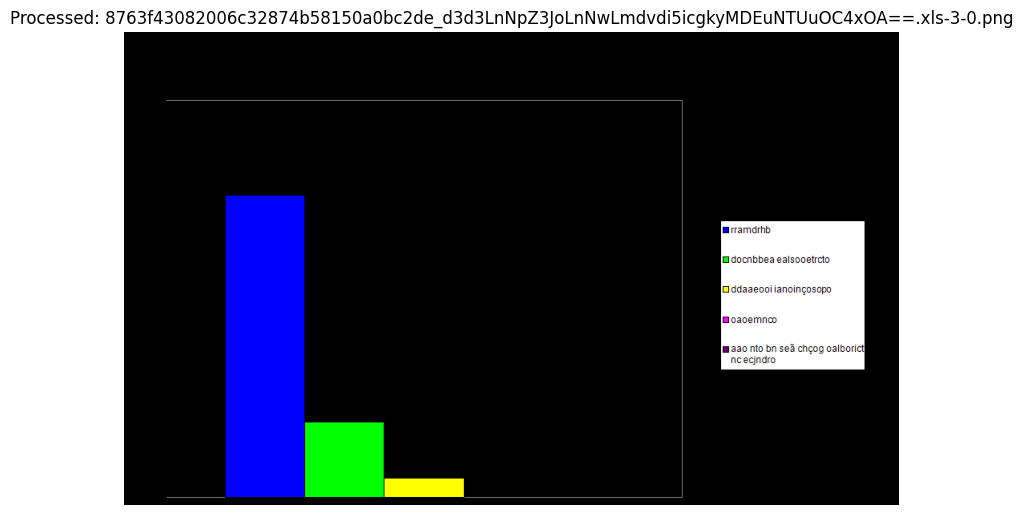


0: 416x640 37 Seriess, 25.7ms
Speed: 2.6ms preprocess, 25.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/14 09:49:01] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.12189507484436035
[2025/03/14 09:49:01] ppocr DEBUG: cls num  : 3, elapsed : 0.007677555084228516
[2025/03/14 09:49:01] ppocr DEBUG: rec_res num  : 3, elapsed : 0.28702354431152344
[DEBUG] Not enough Y-axis labels to calculate values!


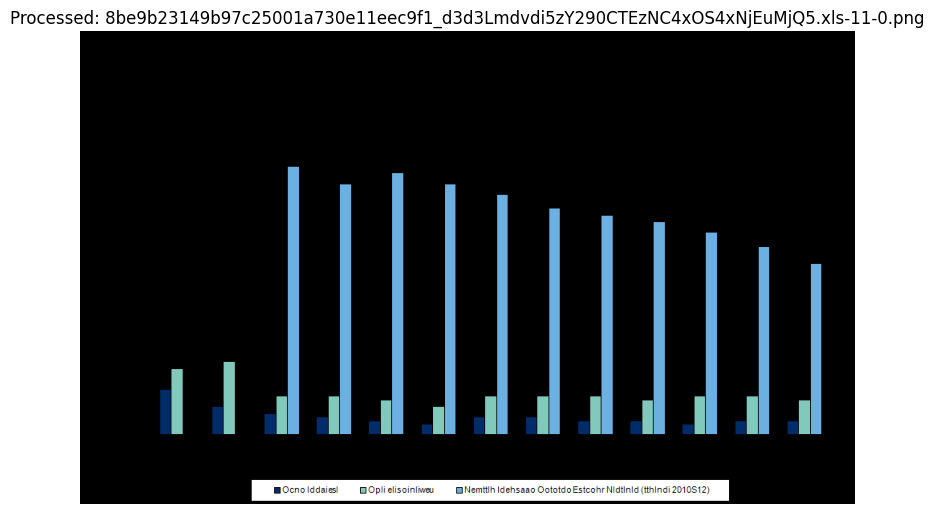


0: 320x640 5 Seriess, 21.8ms
Speed: 1.1ms preprocess, 21.8ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/14 09:49:01] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.1501016616821289
[2025/03/14 09:49:01] ppocr DEBUG: cls num  : 9, elapsed : 0.014073371887207031
[2025/03/14 09:49:02] ppocr DEBUG: rec_res num  : 9, elapsed : 0.2738077640533447


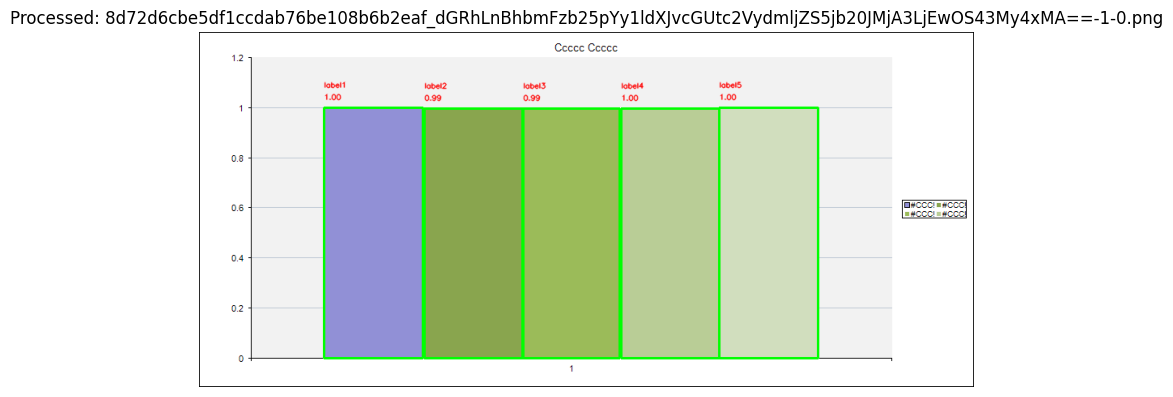


0: 480x640 52 Seriess, 28.8ms
Speed: 1.7ms preprocess, 28.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/14 09:49:02] ppocr DEBUG: dt_boxes num : 100, elapsed : 0.24747323989868164
[2025/03/14 09:49:02] ppocr DEBUG: cls num  : 100, elapsed : 0.14909672737121582
[2025/03/14 09:49:05] ppocr DEBUG: rec_res num  : 100, elapsed : 2.770848512649536


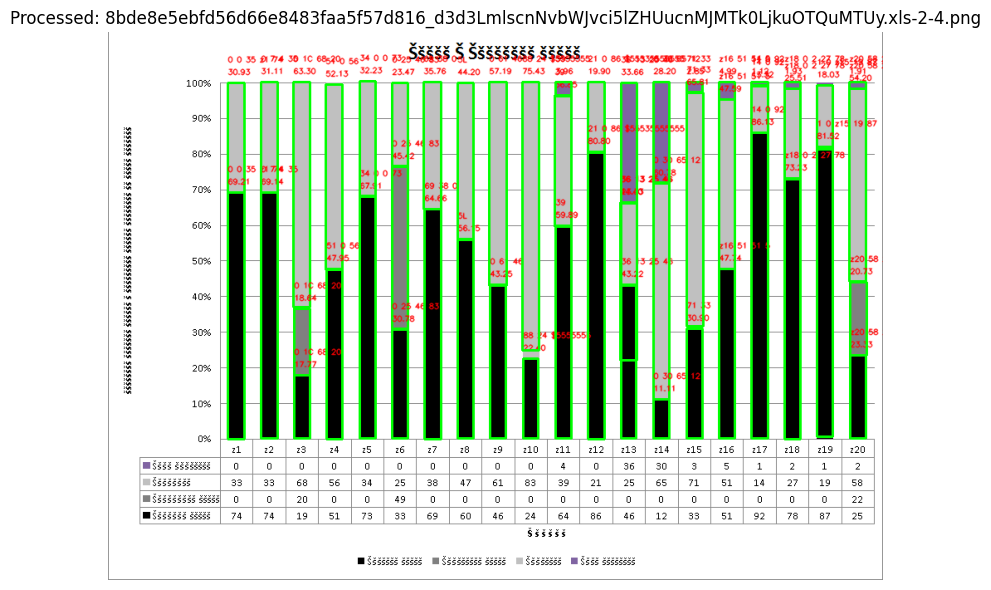

In [35]:
plot_bar_ocr(image_path)